In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
District_fiscal_data = pd.read_csv('C:/Users/devan/Downloads/Sdf16_1a/Sdf16_1a.txt', sep='\t')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (0,3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
District_fiscal_data.head()

,LEAID,CENSUSID,FIPST,CONUM,CSA,CBSA,NAME,STNAME,STABBR,SCHLEV,...,FL_61V,FL_66V,FL_W01,FL_W31,FL_W61,FL_V95,FL_V02,FL_K14,FL_CE1,FL_CE2
0,100002,N,1,01073,142,13820,Alabama Youth Services,Alabama,AL,N,...,M,M,M,M,M,M,M,M,M,M
1,100005,01504840100000,1,01095,290,10700,Albertville City,Alabama,AL,03,...,M,M,R,R,R,M,M,M,M,M
2,100006,01504800100000,1,01095,290,10700,Marshall County,Alabama,AL,03,...,M,M,R,R,R,M,M,M,M,M
3,100007,01503740100000,1,01073,142,13820,Hoover City,Alabama,AL,03,...,M,M,R,R,R,M,M,M,M,M
4,100008,01504530100000,1,01089,290,26620,Madison City,Alabama,AL,03,...,M,M,R,R,R,M,M,M,M,M


#### Problem 1
Import and explore the district-level fiscal data from 2015-16.
Rank and visualize the states that take in the most federal funding (revenue).
Which states spend the most federal funding per student?

##### Rank and Visualize the states that take in the most Federal Revenue

In [6]:
Revenue = District_fiscal_data[["STNAME", "TFEDREV"]]
Revenue = Revenue.groupby(["STNAME"]).sum().reset_index()
Revenue["RANK"] = Revenue["TFEDREV"].rank(ascending=False)
Revenue = Revenue.sort_values(by="TFEDREV", ascending=False)


In [7]:
Revenue

,STNAME,TFEDREV,RANK
4,California,7709274795,1.0
43,Texas,6194316950,2.0
32,New York,3374793578,3.0
9,Florida,3147328988,4.0
13,Illinois,2334944853,5.0
38,Pennsylvania,2037314939,6.0
35,Ohio,1837962930,7.0
10,Georgia,1815241986,8.0
22,Michigan,1731033937,9.0
33,North Carolina,1587975932,10.0


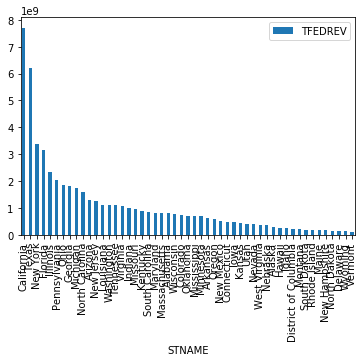

In [8]:
Revenue.plot.bar(x='STNAME',y='TFEDREV') 

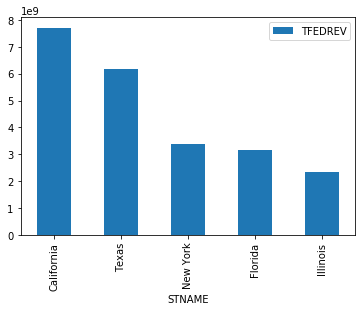

In [9]:
revenue_5= Revenue.head()
revenue_5.plot.bar(x='STNAME',y='TFEDREV') 

##### Which states spend the most federal funding per student?

In [184]:
Spenditure = District_fiscal_data[District_fiscal_data['TFEDREV'] >0]
Spenditure = Spenditure[["STNAME", "TFEDREV", "V33"]].groupby(['STNAME']).sum().reset_index()
Spenditure['SPENDITURE'] = round(Spenditure['TFEDREV'] / Spenditure['V33'])
Spenditure = Spenditure.sort_values(by='SPENDITURE', ascending=False)[['STNAME', 'SPENDITURE']]

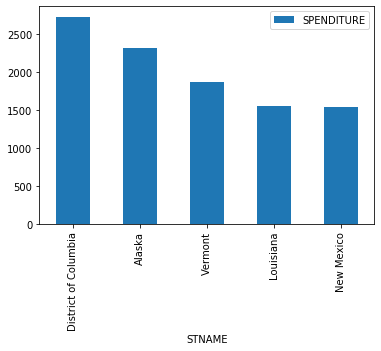

In [185]:
Spenditure_5 = Spenditure.head()
Spenditure_5.plot.bar(x='STNAME',y='SPENDITURE') 

#### Problem 2
Visualize the relationship between school districts’ total revenue and expenditures.
Which states have the most debt per student?

In [46]:
Revenue_Expenditure=[District_fiscal_data["TOTALEXP"]>0]

In [49]:
Revenue_Expenditure = Revenue_Expenditure[["STNAME", "TOTALEXP", "TOTALREV","V33"]].groupby(['STNAME']).sum().reset_index()
Revenue_Expenditure["DEBT"] = Revenue_Expenditure["TOTALEXP"]-Revenue_Expenditure["TOTALREV"]
Revenue_Expenditure["DEBT_PER_STUDENT"] = Revenue_Expenditure["DEBT"]/Revenue_Expenditure['V33']
Revenue_Expenditure.sort_values(by="DEBT_PER_STUDENT",ascending=False)

,STNAME,TOTALEXP,TOTALREV,V33,DEBT,DEBT_PER_STUDENT
34,North Dakota,1963629961,1788748961,108530,174881000,1611.360914
8,District of Columbia,2277770985,2170631985,83369,107139000,1285.117970
1,Alaska,2623014000,2494691000,132477,128323000,968.643614
27,Nebraska,4640421973,4398810973,315958,241611000,764.693409
23,Minnesota,13532992951,12889640951,862021,643352000,746.329846
26,Montana,1879788869,1800908869,145100,78880000,543.625086
33,North Carolina,14911648932,14128773932,1544858,782875000,506.761787
32,New York,68424550578,67055471578,2711496,1369079000,504.916474
0,Alabama,7864635916,7607097916,743717,257538000,346.284944
47,Washington,15260916976,14972162976,1086353,288754000,265.801263


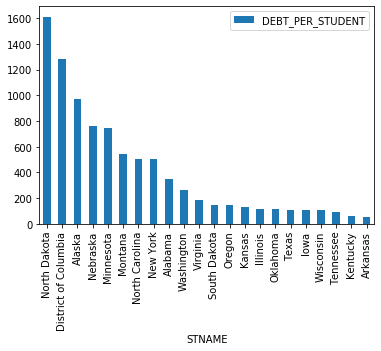

In [50]:
debt = Revenue_Expenditure[Revenue_Expenditure['DEBT_PER_STUDENT']>0].sort_values(by="DEBT_PER_STUDENT",ascending=False)
debt.plot.bar(x='STNAME',y='DEBT_PER_STUDENT')

Text(0.5, 1.0, 'Relationship between Total Expenditure and Total Revenue')

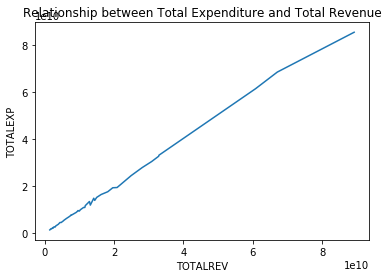

In [51]:
import seaborn as sns
sns.lineplot(y="TOTALEXP", x="TOTALREV", data=Revenue_Expenditure)
plt.title('Relationship between Total Expenditure and Total Revenue')

#### States with most debt are North Dakota, District of Columbia,Alaska,Nebraska and Minnesota

#### Problem-3

The district-level performance metrics from EDFacts may be useful in your decision.
However, to protect student privacy, the data in these datasets has been heavily “blurred” to prevent students
from being identified. Therefore, most of the numeric metrics are presented as ranges in string format. In
addition, censored and missing data must be imputed.
Write and explain a function for processing a single column of “blurred” metrics into usable numeric values.
Use it to process and then visualize the distribution of a performance metric of your choice.


In [96]:
data = pd.read_csv('C:/Users/devan/Downloads/math-achievement-sch-sy2015-16.csv',low_memory=False)
data.head()

,STNAM,FIPST,LEAID,LEANM,NCESSCH,SCHNAM,DATE_CUR,ALL_MTH00NUMVALID_1516,ALL_MTH00PCTPROF_1516,MAM_MTH00NUMVALID_1516,...,MIG_MTH05NUMVALID_1516,MIG_MTH05PCTPROF_1516,MIG_MTH06NUMVALID_1516,MIG_MTH06PCTPROF_1516,MIG_MTH07NUMVALID_1516,MIG_MTH07PCTPROF_1516,MIG_MTH08NUMVALID_1516,MIG_MTH08PCTPROF_1516,MIG_MTHHSNUMVALID_1516,MIG_MTHHSPCTPROF_1516
0,ALABAMA,1,100005,Albertville City,10000500870,Ala Avenue Middle Sch,14APR17,707,36,2,...,NaN,NaN,NaN,NaN,19,21-39,20,LE20,NaN,NaN
1,ALABAMA,1,100005,Albertville City,10000500871,Albertville High Sch,14APR17,307,15,.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,LT50
2,ALABAMA,1,100005,Albertville City,10000500879,Evans Elem Sch,14APR17,772,43,2,...,28,LE20,16,LE20,NaN,NaN,NaN,NaN,NaN,NaN
3,ALABAMA,1,100005,Albertville City,10000500889,Albertville Elem Sch,14APR17,852,55,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ALABAMA,1,100006,Marshall County,10000600193,Kate Duncan Smith DAR Middle,14APR17,443,36,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


This is the first blurred column 'ALL_MTH00PCTPROF_1516'

In [97]:
data['ALL_MTH00PCTPROF_1516'].unique()

array(['36', '15', '43', '55', '33', '40-49', '6-9', '40', '15-19', '31',
       '60-64', '38', '46', '74', '39', '72', '65', '44', '75', '76',
       '73', '70', '56', '70-74', '81', '42', '79', '82', '84', '80',
       '85', '37', '20-24', '10-14', '55-59', '52', 'PS', '86', '24',
       '48', '30', 'LE5', '25-29', '35-39', '30-34', '16', '30-39', '77',
       '51', '65-69', '27', '57', '59', '28', '34', '32', '71', '50',
       '67', '68', '49', '83', '78', '45', '60', '13', '25', '50-54',
       '53', '40-44', '23', '63', '58', '54', '19', '45-49', '12', '10',
       '21', '18', '35', '41', '8', '14', '11', '3', '17', '75-79', '7',
       '20', '5', '2', '62', '26', '47', '69', '9', '22', '80-84',
       '50-59', '29', '70-79', '11-19', '87', '94', '96', '61', '66',
       '64', '4', '20-29', '6', 'LE10', '85-89', 'LE1', '91', '80-89',
       'LE20', '92', '90-94', '93', '89', 'LT50', '90', '40-59', '60-69',
       'GE50', 'GE90', '21-39', '60-79', '88', 'GE95', '97', 'GE80', '95',

#### The function should be able to process the following:

1) Convert the range of the number to the mean 

2) Impute the missing values with the median

3) Replace LT (Lesser than) number with a number lesser by 1

4) Replace LE (Lesser than or equal to) number with a number equal to the number

5) Replace GT (Greater than) number with a number greater by 1

6) Replace GE (Greater than or equal to) number with a number equal to the number

7) Replace the "PS" value with nan

In [151]:
import math
def column_processing(data,col):
    column = data[col]
    processed_column = []
    for x in column:

        if x=='PS':
            new_x=np.nan
            processed_column.append(new_x)
        elif 'GE' in x:
            new_x = int(x[2:])
            processed_column.append(new_x)
        elif 'LE' in x:
            new_x = int(x[2:])
            processed_column.append(new_x)
        elif 'LT' in x:
            new_x = int(x[2:])-1
            processed_column.append(new_x)
        elif 'GT' in x:
            new_x = int(x[2:])+1
            processed_column.append(new_x)
        elif '-' in x:
            num1,num2 = x.split("-")
            new_x = float(int(num1)+int(num2))/2
            processed_column.append(new_x)
        else:
            new_x = int(x)
            processed_column.append(new_x)

        
        [0 if math.isnan(i) else i for i in processed_column] 
        data[col] = processed_column
        return processed_column

In [149]:
processed_column = column_processing(data,'ALL_MTH00PCTPROF_1516')

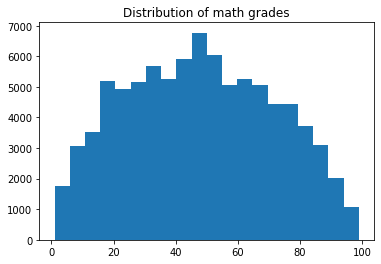

In [158]:
plt.hist(processed_column, bins=20)
plt.title('Distribution of math grades');

#### Problem-4

You are tasked with cutting 15% of the U.S. federal budget currently being spent on funding school districts.
How much money is this?
Choose which school districts will have their funding cut and how this will be done.
(You should produce a table of LEA IDs and the dollar amount by which their federal funding will be cut –
you do not need print the entire table.)

#### Strategy
Cut an equal proportion of funding from all the school districs who have unused/extra money (Total Revenue-Total Expenditure) that sums upto the total revenue to be cut.

In [194]:
total_cut = District_fiscal_data[District_fiscal_data['TFEDREV'] >0]
total_fed_revenue = total_cut['TFEDREV'].sum()
print('The total federal revenue is', total_fed_revenue)
cut = total_fed_revenue * 0.15
print('Total cut is ', cut)
Revenue_cut = District_fiscal_data[["LEAID", "TOTALEXP", "TOTALREV"]].reset_index()
Revenue_cut["Extra"] = Revenue_cut["TOTALREV"] - Revenue_cut["TOTALEXP"]
Revenue_cut = Revenue_cut [Revenue_cut['Extra'] >0]
Revenue_cut.sort_values(by="Extra",ascending=False)
print(len(Revenue_cut['LEAID']))
print(len(District_fiscal_data['LEAID']))
Extra_Total = Revenue_cut['Extra'].sum()
Cut_Proportion = cut/Extra_Total
Revenue_cut['Cut_Amount'] = Cut_Proportion * Revenue_cut['Extra']
Revenue_cut[['LEAID', 'Cut_Amount']].head()

The total federal revenue is 55602742000
Total cut is  8340411300.0
11536
18708


,LEAID,Cut_Amount
1,100005,8.912264e+05
3,100007,7.692256e+05
4,100008,1.409951e+06
7,100012,1.181606e+05
21,100030,8.306691e+05


#### Problem 5

Provide a statement for your supervisor justifying your decisions on which school districts will lose funding.


The whole strategy around cutting 15% of the US Federal budget is centered around the idea that there are a few school districts whose expenditure is less than their revenue and it wouldn't harm them if they lose a portion of their funding since it is an extra amount. It would be unfair to cut revenue from school districs that are already in debt, so I'd decide on cutting out on revenue that goes unused rather than cutting an equal percent from all school districts. 